In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import html
from bs4 import BeautifulSoup
import string
from wordcloud import WordCloud

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
stoplist = set(stopwords.words('english') + list(string.punctuation))

## Load Dataset

In [5]:
df_train_q = pd.read_csv('./dataset/train_questions.csv')
df_train_q

,question_id,question,course,year,candidate_answers,answer_id
0,79062,"For categorical target set, where the distribu...",Machine Learning Zoomcamp,2021,"156400,754877,105368,643810,912439",156400
1,468946,Is there anything that we are not allowed to u...,Machine Learning Zoomcamp,2021,"641330,634887,912439,425941,642829",634887
2,968800,I have been catching up and have been doing ho...,Data Engineering Zoomcamp,2022,"954016,167856,75919,36798,838013",954016
3,688404,Could you please explain what code we should l...,Data Engineering Zoomcamp,2022,"198661,629898,686577,3699,141765",3699
4,63921,Is it just me or does the model have really ba...,Machine Learning Zoomcamp,2021,"754877,604487,912439,858915,425941",858915
...,...,...,...,...,...,...
392,241788,Can the model with the ROC AUC score of around...,Machine Learning Zoomcamp,2021,"274012,831391,912439,596854,214199",831391
393,595103,When I click tab in the parentheses of the iPy...,Machine Learning Zoomcamp,2021,"325935,651754,478055,214199,912439",651754
394,450348,Can you please explain the use cases of Splunk...,Data Engineering Zoomcamp,2022,"432981,908368,296080,131069,733226",733226
395,864660,Why did you use model2bin in the last question...,Machine Learning Zoomcamp,2021,"40420,422297,32377,169051,623076",422297


In [6]:
df_train_ans = pd.read_csv('./dataset/train_answers.csv')
df_train_ans

,answer_id,answer,course,year,attachments_files
0,156400,Alexey\nShould we use something non-standard t...,Machine Learning Zoomcamp,2021,NaN
1,634887,"No, I don't think there is anything you cannot...",Machine Learning Zoomcamp,2021,NaN
2,954016,"Alexey\nYes, you will be. You can submit the p...",Data Engineering Zoomcamp,2022,NaN
3,3699,Alexey\nI think the question refers to the hom...,Data Engineering Zoomcamp,2022,NaN
4,858915,"Dmitry\nIt's fine, because this is the showcas...",Machine Learning Zoomcamp,2021,NaN
...,...,...,...,...,...
392,831391,"Yes, it can. It's really dataset dependent. Fo...",Machine Learning Zoomcamp,2021,NaN
393,651754,"Let's say I do “import numpy as np” and then, ...",Machine Learning Zoomcamp,2021,NaN
394,733226,Alexey\nSplunk – I don’t know. It's not a data...,Data Engineering Zoomcamp,2022,NaN
395,422297,"Yes, it was not mentioned. But what was mentio...",Machine Learning Zoomcamp,2021,NaN


In [7]:
df_test_q = pd.read_csv('./dataset/test_questions.csv')
df_test_q

,question_id,question,course,year,candidate_answers
0,707,How much of an effort would it be to use AWS i...,Data Engineering Zoomcamp,2023,"336232,337669,258304,47681,767296"
1,534450,Can you talk about linear regression and regul...,Machine Learning Zoomcamp,2022,"231208,282072,86769,573165,138373"
2,996163,Can you please explain the Python Black setup ...,Data Engineering Zoomcamp,2023,"571892,816559,47681,337669,336232"
3,860215,How many portfolio projects apart from the cou...,Machine Learning Zoomcamp,2022,"643931,988549,918931,235894,608866"
4,980124,Can you talk more about the final project? Wha...,Data Engineering Zoomcamp,2023,"384381,337669,258304,47681,747722"
...,...,...,...,...,...
511,385696,How can we contribute to the course?,Data Engineering Zoomcamp,2023,"258304,630862,856125,47681,366701"
512,178777,How should I organize my data lake – by depart...,Data Engineering Zoomcamp,2023,"757091,337669,557268,521840,336232"
513,134025,What Java aspects will be covered in the cours...,Data Engineering Zoomcamp,2023,"125560,323555,770524,47681,366701"
514,881774,The retries of tasks can be notified? Or do we...,Data Engineering Zoomcamp,2023,"585024,922526,647021,337669,844757"


In [8]:
df_test_ans = pd.read_csv('./dataset/test_answers.csv')
df_test_ans

,answer_id,answer,course,year,attachments_files
0,767296,Alexey\nProbably more than you want to put in....,Data Engineering Zoomcamp,2023,NaN
1,573165,"Yes, I can. There is actually an entire module...",Machine Learning Zoomcamp,2022,NaN
2,571892,Jeff\nI can try. I like Black a lot. If you ju...,Data Engineering Zoomcamp,2023,NaN
3,988549,"Again, you’ll probably hate me soon for saying...",Machine Learning Zoomcamp,2022,NaN
4,384381,Alexey\nThe first thing about the dataset – wh...,Data Engineering Zoomcamp,2023,NaN
...,...,...,...,...,...
511,366701,Alexey\nThe best way to contribute is to take ...,Data Engineering Zoomcamp,2023,NaN
512,521840,Alexey\nAnkush will probably be a better perso...,Data Engineering Zoomcamp,2023,NaN
513,770524,"For Spark, we use Python. So it's PySpark. So ...",Data Engineering Zoomcamp,2023,NaN
514,647021,"Alexey\nI guess this is related to Prefect, ri...",Data Engineering Zoomcamp,2023,NaN


## Preprocessing dataset

Here we will split our training dataset to train and dev, after it we transform our dataset to formatted dataset for fit our training script

#### Split Dataset

In [9]:
#split train dev dataset -> 90%:10%
random_state = 1
df_splitted_train_q, df_splitted_dev_q = train_test_split(df_train_q, test_size=0.1, random_state=random_state)

In [10]:
df_splitted_train_q

,question_id,question,course,year,candidate_answers,answer_id
58,907802,Would you say DBT is the next big thing in the...,Data Engineering Zoomcamp,2022,"666820,64848,704244,54998,586825",54998
236,561335,How can I know my homework score after submiss...,Machine Learning Zoomcamp,2021,"912439,425941,673779,754877,604487",673779
286,330630,Is clustering problem allowed for the midterm ...,Machine Learning Zoomcamp,2021,"347048,194806,643810,754877,173078",173078
353,817985,I'm struggling to run python script with Tenso...,Machine Learning Zoomcamp,2021,"642829,754877,425941,204684,426370",426370
307,97473,Will the project be group or individual work?,Data Engineering Zoomcamp,2022,"75919,615971,131069,110700,250778",250778
...,...,...,...,...,...,...
203,33653,If my post on social networks doesn't get any ...,Data Engineering Zoomcamp,2022,"277928,296080,432981,75919,449040",277928
255,103222,Is it necessary for junior data scientists to ...,Machine Learning Zoomcamp,2021,"105368,425941,641330,912439,659528",659528
72,647840,How many submissions were there this week?,Machine Learning Zoomcamp,2021,"912439,425941,105368,276086,604487",276086
235,124395,If I want to do feature engineering (adding a ...,Machine Learning Zoomcamp,2021,"604487,525898,912439,754877,872175",872175


In [11]:
df_splitted_dev_q

,question_id,question,course,year,candidate_answers,answer_id
174,436262,Do you have plans for another Zoomcamp in the ...,Data Engineering Zoomcamp,2022,"131069,195145,611684,75919,432981",611684
359,618453,Can Jenkins or GitLab be used instead of Airflow?,Data Engineering Zoomcamp,2022,"131069,969531,478083,159394,862021",969531
250,211770,"In the train.py, we train the model and save t...",Machine Learning Zoomcamp,2021,"912439,596854,380014,274012,214199",380014
274,169524,Can you please clarify where to use from_logit...,Machine Learning Zoomcamp,2021,"194806,214199,105368,641330,912439",194806
283,409807,I understand that there is a growing importanc...,Data Engineering Zoomcamp,2022,"594349,75919,36798,64848,131069",594349
232,560178,Can we somehow learn how many points (for home...,Machine Learning Zoomcamp,2021,"912439,373352,276086,214199,489731",489731
117,210828,What are the must-have resources/materials for...,Machine Learning Zoomcamp,2021,"604487,596854,623076,754877,214199",623076
348,43065,Can we host ML models on GitHub Pages?,Machine Learning Zoomcamp,2021,"134714,373352,878140,912439,196532",196532
189,322429,Is there any way to know exactly how many bins...,Machine Learning Zoomcamp,2021,"204684,214199,912439,481080,300376",481080
106,547171,I can build and run the Docker container but t...,Machine Learning Zoomcamp,2021,"274012,641330,214199,912439,940532",940532


#### Format Dataset

In [12]:
def formatDataset(df_ques, df_ans):
    formattedDatasets = {'sentence1':[], 'sentence2':[], 'label':[]}
    for index, row in df_ques.iterrows():
        candidate_answer_ids = row['candidate_answers'].split(",")
        question = row['question']
        correct_ans_id = row['answer_id'] if 'answer_id' in df_ques else -1
        

        for ans_id in candidate_answer_ids:
            answer = df_ans[df_ans['answer_id'] == int(ans_id)]['answer'].iloc[0]

            formattedDatasets['sentence1'].append(question)
            formattedDatasets['sentence2'].append(answer)
            
            if correct_ans_id != -1:
                label = 1 if int(ans_id) == int(correct_ans_id) else 0 
                formattedDatasets['label'].append(label)
    
    if len(formattedDatasets['label']) == 0:
        del formattedDatasets['label']

    #store converted data in dataframe
    return pd.DataFrame(formattedDatasets) 

In [13]:
train_formatted_df = formatDataset(df_splitted_train_q,df_train_ans)
train_formatted_df

,sentence1,sentence2,label
0,Would you say DBT is the next big thing in the...,"Alexey\nFor example, in Spark, if you Google “...",0
1,Would you say DBT is the next big thing in the...,"Ankush\nYes. Yes, you can. But I think this is...",0
2,Would you say DBT is the next big thing in the...,Victoria\nI would say it’s also because there'...,0
3,Would you say DBT is the next big thing in the...,Victoria\nYes.,1
4,Would you say DBT is the next big thing in the...,Alexey\nMaybe I was like that. Every time I he...,0
...,...,...,...
1780,Are there plans to write some articles on Medi...,Alexey\nYes. That's the homework and the first...,0
1781,Are there plans to write some articles on Medi...,Ankush\nWhat we use is basically unit testing....,0
1782,Are there plans to write some articles on Medi...,Ankush\nIf you're talking specifically about i...,0
1783,Are there plans to write some articles on Medi...,Alexey\nWe don't have it in our curriculum. We...,1


In [14]:
dev_formatted_df = formatDataset(df_splitted_dev_q,df_train_ans)
dev_formatted_df

,sentence1,sentence2,label
0,Do you have plans for another Zoomcamp in the ...,Alexey\nYes. That's the homework and the first...,0
1,Do you have plans for another Zoomcamp in the ...,Alexey\nWe have 33 submissions. I think the de...,0
2,Do you have plans for another Zoomcamp in the ...,Alexey\nIs the question about the Data Enginee...,1
3,Do you have plans for another Zoomcamp in the ...,Victoria\nSQL is definitely super important. I...,0
4,Do you have plans for another Zoomcamp in the ...,Ankush\nIf you're talking specifically about i...,0
...,...,...,...
195,Is there a limit for the number of options in ...,"No reason. If you like FastAPI, go for it.",0
196,Is there a limit for the number of options in ...,Alexey\nI think in the lectures we used five. ...,1
197,Is there a limit for the number of options in ...,"Yes. If you're running on Windows, what you ca...",0
198,Is there a limit for the number of options in ...,I don't know if you're referring to this. [ima...,0


In [15]:
test_formatted_df = formatDataset(df_test_q,df_test_ans)
test_formatted_df

,sentence1,sentence2
0,How much of an effort would it be to use AWS i...,"No, you cannot."
1,How much of an effort would it be to use AWS i...,"Yeah. I am a data scientist and, as a part of ..."
2,How much of an effort would it be to use AWS i...,I think I already showed you. If you go to our...
3,How much of an effort would it be to use AWS i...,I don't know. I never tried to do it there. Ma...
4,How much of an effort would it be to use AWS i...,Alexey\nProbably more than you want to put in....
...,...,...
2575,Can you explain regularization better? I did n...,Because we were a bit delayed with the BentoML...
2576,Can you explain regularization better? I did n...,"Go to LinkedIn, find a job that you like, clic..."
2577,Can you explain regularization better? I did n...,Why do you think it will be irrelevant? Do you...
2578,Can you explain regularization better? I did n...,"Yes, that's the main reason we have two capsto..."


## EDA

#### Sample of question with the answer candidate

In [16]:
train_formatted_df.iloc[0]['sentence1']

'Would you say DBT is the next big thing in the data stack?'

In [17]:
train_formatted_df[train_formatted_df['sentence1'] =='Would you say DBT is the next big thing in the data stack?']

,sentence1,sentence2,label
0,Would you say DBT is the next big thing in the...,"Alexey\nFor example, in Spark, if you Google “...",0
1,Would you say DBT is the next big thing in the...,"Ankush\nYes. Yes, you can. But I think this is...",0
2,Would you say DBT is the next big thing in the...,Victoria\nI would say it’s also because there'...,0
3,Would you say DBT is the next big thing in the...,Victoria\nYes.,1
4,Would you say DBT is the next big thing in the...,Alexey\nMaybe I was like that. Every time I he...,0


#### Example of correct candidate answer (positive answer)

In [18]:
train_formatted_df.iloc[3]['sentence2']

'Victoria\nYes.'

#### Example of incorrect candidate answer (negative answer)

In [19]:
train_formatted_df.iloc[4]['sentence2']

"Alexey\nMaybe I was like that. Every time I heard that there was a new language, a new tool, a new something, I wanted to try it. But then I realized that these new tools are usually pretty raw. They look shiny, but when you start using them, a lot of problems come up. Sometimes it's better to use time-proven tools and be a bit conservative. This is something that happened with experience of trying these tools and then seeing that even though they look shiny, there are still some bugs, especially if it's a new tool. How to mitigate this mindset in the workplace? I don't know. I guess it depends on the use case, but just ask yourself (or the team) “How much does this new tool actually bring you? What are the pros and cons? How much work will you add to what you have when you integrate the new tool and what are the potential benefits?” If the benefits outweigh the headaches you will have, then you can go with this. Usually, when you do this analysis, you see that maybe you don't actuall

#### Number of positive and negative sample comparison

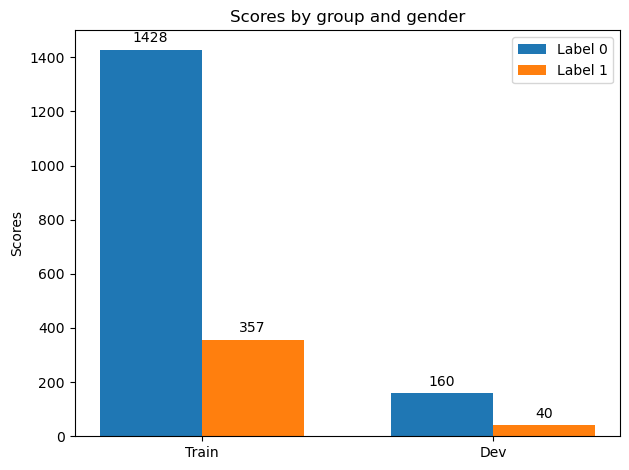

In [20]:
datasets = ("Train", "Dev")
train_label_0_len = len(train_formatted_df[train_formatted_df['label'] == 0])
train_label_1_len = len(train_formatted_df[train_formatted_df['label'] ==1])

dev_label_0_len = len(dev_formatted_df[dev_formatted_df['label'] == 0])
dev_label_1_len = len(dev_formatted_df[dev_formatted_df['label'] == 1])

x = np.arange(len(datasets))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [train_label_0_len,dev_label_0_len], width, label='Label 0')
rects2 = ax.bar(x + width/2, [train_label_1_len,dev_label_1_len], width, label='Label 1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


#### Cleansing text

There is alot of unnecessary character like "\xa0" and "\n", so here we remove it first for avoiding that kind noise in the training process. Also here we will normalize the text with lowercasing

In [21]:
def clean_text(text):
    # Remove leading and trailing whitespaces
    cleaned_text = text.strip()
    
    # Unescape HTML entities
    cleaned_text = BeautifulSoup(cleaned_text, "lxml").get_text(strip=True)
    
    # Replace special case noise character
    cleaned_text = cleaned_text.replace("\xa0\n", " ")
    
    # Lowercasing
    cleaned_text = cleaned_text.lower()
    
    # Remove unwanted characters and extra whitespaces
    cleaned_text = ' '.join(cleaned_text.split())

    # Remove stopword and punctuation
    cleaned_text = [i for i in word_tokenize(cleaned_text.lower()) if i not in stoplist]
    
    return ' '.join(cleaned_text)

train_formatted_df['sentence1'] = train_formatted_df['sentence1'].apply(clean_text)
train_formatted_df['sentence2'] = train_formatted_df['sentence2'].apply(clean_text)

dev_formatted_df['sentence1'] = dev_formatted_df['sentence1'].apply(clean_text)
dev_formatted_df['sentence2'] = dev_formatted_df['sentence2'].apply(clean_text)

/var/folders/8x/5j1l_0b13wj0nt64vq4kmyzr0000gn/T/ipykernel_85609/2384476329.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleaned_text = BeautifulSoup(cleaned_text, "lxml").get_text(strip=True)


text after cleansing

In [22]:
train_formatted_df.iloc[4]['sentence2']

"alexey maybe like every time heard new language new tool new something wanted try realized new tools usually pretty raw look shiny start using lot problems come sometimes 's better use time-proven tools bit conservative something happened experience trying tools seeing even though look shiny still bugs especially 's new tool mitigate mindset workplace n't know guess depends use case ask team “ much new tool actually bring pros cons much work add integrate new tool potential benefits ” benefits outweigh headaches go usually analysis see maybe n't actually need new tool old one fine victoria critical mindset go something 's hype always go read everything kind see “ something 'm already using add much value much headaches add ” also 's another tool maintain consider critical mindset definitely"

In [23]:
dev_formatted_df.iloc[4]['sentence2']

"ankush 're talking specifically interviews – employer sending software engineering interviews data engineer maybe 's right role maybe 's correct company maybe talking tech recruiter understanding role might give insights exact role honestly “ data engineer ” used lot days lot companies also use “ data engineers ” way describe data product developers software engineers working data-intensive applications might worth clearing knowledge algorithms data structures think basics software engineering – data engineering analytical data scientists learning algorithms data structures would always help career irrespective fact going towards data engineering data science domain alexey would add even data scientist less engineering-heavy specialization 's useful know data structures algorithms example using list instead set degrade performance data pipelines significantly sometimes one line change increase performance data pipelines like 10 times 100 times knowing things like useful need read klep

#### Train's answers word cloud

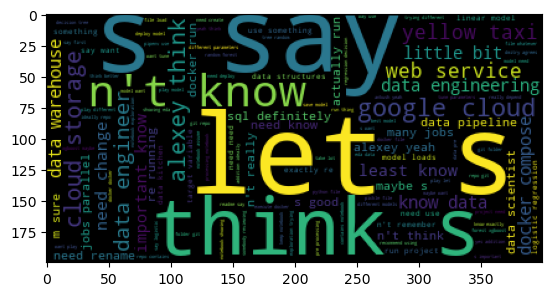

In [26]:
merged_train_answers = ' '.join(train_formatted_df['sentence2'])
wc = WordCloud().generate(merged_train_answers)
plt.imshow(wc)

#### Train's questions word cloud

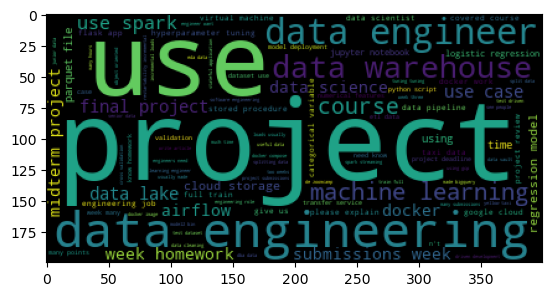

In [32]:
merged_train_questions = ' '.join(train_formatted_df['sentence1'])
wc = WordCloud().generate(merged_train_questions)
plt.imshow(wc)

#### Dev's answers word cloud

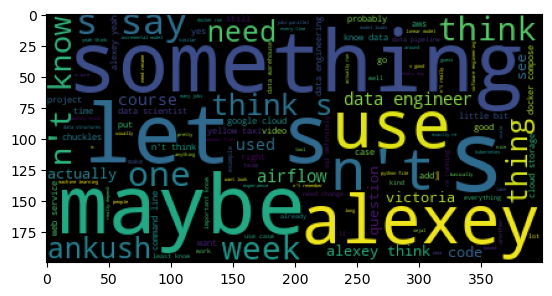

In [30]:
merged_dev_answers = ' '.join(dev_formatted_df['sentence2'])
wc = WordCloud().generate(merged_dev_answers)
plt.imshow(wc)

#### Dev's question word cloud

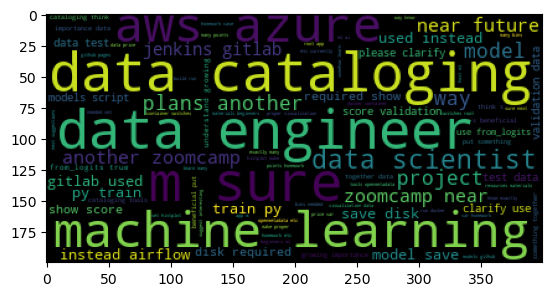

In [31]:
merged_dev_questions = ' '.join(dev_formatted_df['sentence1'])
wc = WordCloud().generate(merged_dev_questions)
plt.imshow(wc)

In [36]:
train_formatted_df.to_csv('formatted-datasets/train.tsv', sep="\t", index=False) 
dev_formatted_df.to_csv('formatted-datasets/dev.tsv', sep="\t", index=False)
test_formatted_df.to_csv('formatted-datasets/test.tsv', sep="\t", index=False)

## Training

In [ ]:
df_train_q = 